In [251]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
#import scipy.sparse
%matplotlib inline
import csv

In [252]:
def word_count(words):
    words = words.replace('  ', ' ')
    words = words.replace('/n','')
    words = words.strip()
    return int(len(words.split(' ')))
        

In [253]:
unclean_df = pd.read_csv('encoded_genres.tsv', sep='\t', index_col=0)
unclean_df

,tconst,title,release_year,release_date,MPAA,genre,runtime,poster_url,plot_short,plot_long,imdb_rating,num_imdb_votes,plot_full,metacritic,num_user_reviews,num_critic_reviews,action,adult,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film-noir,game-show,history,horror,music,musical,mystery,news,romance,sci-fi,sport,thriller,war,western
0,tt0010323,Das Cabinet des Dr. Caligari,1920,27 February 1920,Not Rated,"['Fantasy', 'Horror', 'Mystery', 'Thriller']",67,https://m.media-amazon.com/images/M/MV5BNWJiNG...,"Hypnotist Dr. Caligari uses a somnambulist, Ce...","Francis, a young man, recalls in his memory th...",8.1,52815,THE CABINET OF DR. CALIGARIFrancis (Friedrich ...,NaN,222.0,156.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0
1,tt0011237,"Der Golem, wie er in die Welt kam",1920,19 June 1921,Unrated,"['Fantasy', 'Horror']",91,https://m.media-amazon.com/images/M/MV5BMTQ5MT...,"In 16th-century Prague, a rabbi creates the Go...","In 16th-century Prague, a rabbi creates the Go...",7.2,6136,NaN,NaN,49.0,45.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,tt0011841,Way Down East,1920,3 September 1920,Passed,"['Drama', 'Romance']",145,https://m.media-amazon.com/images/M/MV5BMjI5OT...,A naive country girl is tricked into a sham ma...,"The callous rich, portrayed by Lennox, think o...",7.4,4800,NaN,NaN,49.0,28.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,tt0011130,Dr. Jekyll and Mr. Hyde,1920,28 September 1920,Unrated,"['Drama', 'Horror', 'Sci-Fi']",82,https://m.media-amazon.com/images/M/MV5BMzE5Yj...,Dr. Henry Jekyll experiments with scientific m...,Based on the Robert Louis Stevenson story: Doc...,7.0,4564,NaN,NaN,71.0,65.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,tt0011870,Within Our Gates,1920,12 January 1920,Not Rated,"['Drama', 'Romance']",79,https://m.media-amazon.com/images/M/MV5BOGZhYj...,"Abandoned by her fiancé, an educated black wom...",Southern negro Sylvia Landry visits her cousin...,6.3,2139,NaN,NaN,20.0,13.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30077,tt11529348,5Gang: Un Altfel de Craciun,2019,27 December 2019,NaN,"['Action', 'Comedy']",100,https://m.media-amazon.com/images/M/MV5BZTg1Zj...,The story is about friendship and family witch...,The story is about friendship and family witch...,1.4,1347,NaN,NaN,19.0,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30078,tt9285882,Blue Story,2019,22 November 2019,NaN,"['Crime', 'Drama']",91,https://m.media-amazon.com/images/M/MV5BNDZmYj...,Feature adaptation of Rapman's YouTube series ...,Blue Story is a tragic tale of a friendship be...,5.5,1066,NaN,NaN,60.0,19.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30079,tt5990444,The Trap,2019,1 April 2019,NaN,Comedy,90,https://m.media-amazon.com/images/M/MV5BOTI3ZG...,A man returns home to Atlanta to help his brot...,"A good man (Tip ""T.I."" Harris) returns home to...",4.2,1010,NaN,NaN,43.0,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30080,tt7319496,Ut og stjæle hester,2019,8 March 2019,NaN,"['Drama', 'Mystery']",123,https://m.media-amazon.com/images/M/MV5BZjZjMG...,A grieving widower moves to the country where ...,A grieving widower moves to the country where ...,6.7,1057,NaN,69.0,5.0,36.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [254]:
unclean_df[ unclean_df['tconst'] == 'tt0104868']

,tconst,title,release_year,release_date,MPAA,genre,runtime,poster_url,plot_short,plot_long,imdb_rating,num_imdb_votes,plot_full,metacritic,num_user_reviews,num_critic_reviews,action,adult,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film-noir,game-show,history,horror,music,musical,mystery,news,romance,sci-fi,sport,thriller,war,western
9085,tt0104868,The Mighty Ducks,1992,18 June 1993,PG,"['Comedy', 'Drama', 'Family', 'Sport']",104,https://m.media-amazon.com/images/M/MV5BZTc4Yz...,A self-centered Minnesota lawyer is sentenced ...,"Gordon Bombay, a hotshot lawyer, is haunted by...",6.5,55151,NaN,46.0,54.0,31.0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [255]:
all_genres = []

for row in unclean_df['genre']:
    # CLean up genre name before adding to master list
    i = row.strip('[]').replace("'",'').split(', ')
    for j in i:
        all_genres.append(j)
        
all_genres = list(set(all_genres))
print(f'Num genres: {len(all_genres)}')
#display(clean_df.head())

Num genres: 25


In [256]:
all_genres.sort()
all_genres = [g.lower() for g in all_genres]
all_genres

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'romance',
 'sci-fi',
 'sport',
 'thriller',
 'war',
 'western']

In [257]:
g_count = []
genres = []

for g in all_genres:
    #print(f'{g:12} {unclean_df[g].value_counts()[1]:6}')
    genres.append(g)
    g_count.append(unclean_df[g].value_counts()[1])

genre_counts = dict(zip(genres, g_count))
genre_counts

{'action': 5491,
 'adult': 2,
 'adventure': 3340,
 'animation': 968,
 'biography': 1599,
 'comedy': 10596,
 'crime': 4922,
 'documentary': 1335,
 'drama': 16754,
 'family': 1810,
 'fantasy': 2356,
 'film-noir': 311,
 'game-show': 1,
 'history': 1382,
 'horror': 4034,
 'music': 1870,
 'musical': 874,
 'mystery': 2777,
 'news': 41,
 'romance': 6738,
 'sci-fi': 2478,
 'sport': 795,
 'thriller': 7516,
 'war': 1493,
 'western': 676}

In [258]:
dfg = pd.DataFrame.from_dict(genre_counts,orient='index')
dfg = dfg.reset_index()
dfg.columns = ['genre','count']
dfg = dfg.sort_values('count', ascending=False)
dfg

,genre,count
8,drama,16754
5,comedy,10596
22,thriller,7516
19,romance,6738
0,action,5491
6,crime,4922
14,horror,4034
2,adventure,3340
17,mystery,2777
20,sci-fi,2478


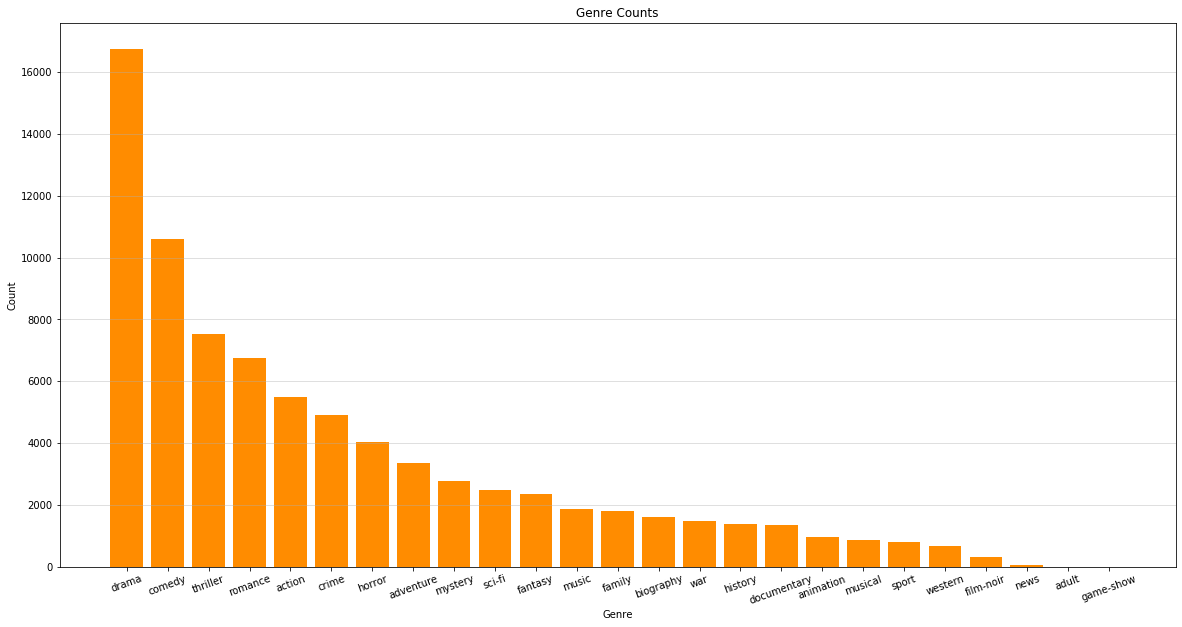

In [259]:
dfg = dfg.sort_values('count', ascending=False)
plt.figure(figsize=(20,10))
plt.bar(dfg['genre'], dfg['count'], color='darkorange')
plt.title('Genre Counts')
plt.ylabel('Count')
plt.xlabel('Genre')
plt.grid(axis='y', alpha=0.5)
plt.xticks(rotation='20')
#plt.xticks(range(0,17001,1000))
plt.show()

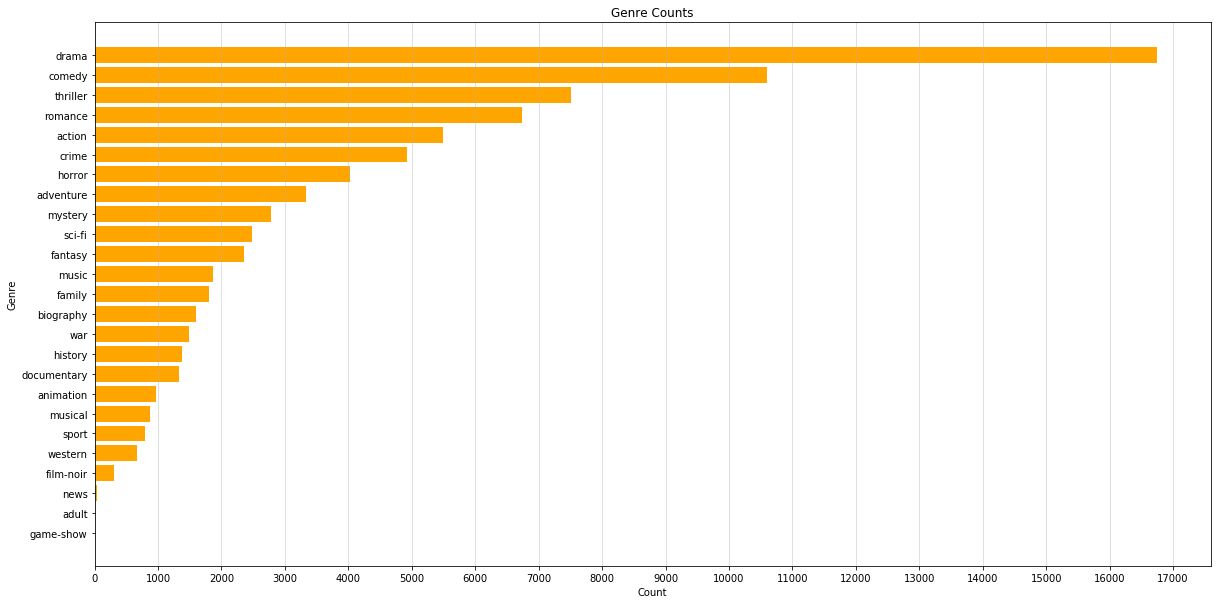

In [260]:
dfg = dfg.sort_values('count', ascending=True)
plt.figure(figsize=(20,10))
plt.barh(dfg['genre'], dfg['count'], color='orange')
plt.title('Genre Counts')
plt.ylabel('Genre')
plt.xlabel('Count')
plt.xticks(range(0,17001,1000))
plt.grid(axis='x', alpha=0.5)
plt.show()

In [261]:
unclean_df[ unclean_df['tconst'] == 'tt2179136']

,tconst,title,release_year,release_date,MPAA,genre,runtime,poster_url,plot_short,plot_long,imdb_rating,num_imdb_votes,plot_full,metacritic,num_user_reviews,num_critic_reviews,action,adult,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film-noir,game-show,history,horror,music,musical,mystery,news,romance,sci-fi,sport,thriller,war,western
23675,tt2179136,American Sniper,2014,16 January 2015,R,"['Action', 'Biography', 'Drama', 'War']",133,https://m.media-amazon.com/images/M/MV5BMTkxNz...,Navy S.E.A.L. sniper Chris Kyle's (Bradley Coo...,Chris Kyle (Bradley Cooper) was nothing more t...,7.3,417044,"In the opening scene, US Navy SEAL sniper Chri...",72.0,1016.0,519.0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [262]:
unclean_df.isna().sum()

tconst                    0
title                     0
release_year              0
release_date              0
MPAA                   5611
genre                     0
runtime                   0
poster_url                0
plot_short               37
plot_long                37
imdb_rating               0
num_imdb_votes            0
plot_full             20087
metacritic            18071
num_user_reviews        132
num_critic_reviews      898
action                    0
adult                     0
adventure                 0
animation                 0
biography                 0
comedy                    0
crime                     0
documentary               0
drama                     0
family                    0
fantasy                   0
film-noir                 0
game-show                 0
history                   0
horror                    0
music                     0
musical                   0
mystery                   0
news                      0
romance             

In [263]:
cleaner_df = unclean_df.copy()
cleaner_df = cleaner_df.drop(['genre','plot_full','poster_url','metacritic','MPAA'], axis = 1)
cleaner_df = cleaner_df[cleaner_df['plot_long'].isna() != True ]
cleaner_df = cleaner_df.fillna(0)
cleaner_df

,tconst,title,release_year,release_date,runtime,plot_short,plot_long,imdb_rating,num_imdb_votes,num_user_reviews,num_critic_reviews,action,adult,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film-noir,game-show,history,horror,music,musical,mystery,news,romance,sci-fi,sport,thriller,war,western
0,tt0010323,Das Cabinet des Dr. Caligari,1920,27 February 1920,67,"Hypnotist Dr. Caligari uses a somnambulist, Ce...","Francis, a young man, recalls in his memory th...",8.1,52815,222.0,156.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0
1,tt0011237,"Der Golem, wie er in die Welt kam",1920,19 June 1921,91,"In 16th-century Prague, a rabbi creates the Go...","In 16th-century Prague, a rabbi creates the Go...",7.2,6136,49.0,45.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,tt0011841,Way Down East,1920,3 September 1920,145,A naive country girl is tricked into a sham ma...,"The callous rich, portrayed by Lennox, think o...",7.4,4800,49.0,28.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,tt0011130,Dr. Jekyll and Mr. Hyde,1920,28 September 1920,82,Dr. Henry Jekyll experiments with scientific m...,Based on the Robert Louis Stevenson story: Doc...,7.0,4564,71.0,65.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,tt0011870,Within Our Gates,1920,12 January 1920,79,"Abandoned by her fiancé, an educated black wom...",Southern negro Sylvia Landry visits her cousin...,6.3,2139,20.0,13.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30077,tt11529348,5Gang: Un Altfel de Craciun,2019,27 December 2019,100,The story is about friendship and family witch...,The story is about friendship and family witch...,1.4,1347,19.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30078,tt9285882,Blue Story,2019,22 November 2019,91,Feature adaptation of Rapman's YouTube series ...,Blue Story is a tragic tale of a friendship be...,5.5,1066,60.0,19.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30079,tt5990444,The Trap,2019,1 April 2019,90,A man returns home to Atlanta to help his brot...,"A good man (Tip ""T.I."" Harris) returns home to...",4.2,1010,43.0,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30080,tt7319496,Ut og stjæle hester,2019,8 March 2019,123,A grieving widower moves to the country where ...,A grieving widower moves to the country where ...,6.7,1057,5.0,36.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [264]:
cleaner_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30045 entries, 0 to 30081
Data columns (total 36 columns):
tconst                30045 non-null object
title                 30045 non-null object
release_year          30045 non-null int64
release_date          30045 non-null object
runtime               30045 non-null int64
plot_short            30045 non-null object
plot_long             30045 non-null object
imdb_rating           30045 non-null float64
num_imdb_votes        30045 non-null int64
num_user_reviews      30045 non-null float64
num_critic_reviews    30045 non-null float64
action                30045 non-null int64
adult                 30045 non-null int64
adventure             30045 non-null int64
animation             30045 non-null int64
biography             30045 non-null int64
comedy                30045 non-null int64
crime                 30045 non-null int64
documentary           30045 non-null int64
drama                 30045 non-null int64
family              

In [265]:
cleaner_df.isna().sum()

tconst                0
title                 0
release_year          0
release_date          0
runtime               0
plot_short            0
plot_long             0
imdb_rating           0
num_imdb_votes        0
num_user_reviews      0
num_critic_reviews    0
action                0
adult                 0
adventure             0
animation             0
biography             0
comedy                0
crime                 0
documentary           0
drama                 0
family                0
fantasy               0
film-noir             0
game-show             0
history               0
horror                0
music                 0
musical               0
mystery               0
news                  0
romance               0
sci-fi                0
sport                 0
thriller              0
war                   0
western               0
dtype: int64

In [266]:
for i in cleaner_df.index:
    cleaner_df.loc[ cleaner_df.index == i, 'word_count_short' ] = word_count(cleaner_df.loc[i, 'plot_short'])
    cleaner_df.loc[ cleaner_df.index == i, 'word_count_long' ] = word_count(cleaner_df.loc[i, 'plot_long'])
    print(f'       {i}',end='\r')
cleaner_df = cleaner_df.astype({'word_count_short': 'int64','word_count_long': 'int64'})

In [267]:
cleaner_df.head(1)

,tconst,title,release_year,release_date,runtime,plot_short,plot_long,imdb_rating,num_imdb_votes,num_user_reviews,num_critic_reviews,action,adult,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film-noir,game-show,history,horror,music,musical,mystery,news,romance,sci-fi,sport,thriller,war,western,word_count_short,word_count_long
0,tt0010323,Das Cabinet des Dr. Caligari,1920,27 February 1920,67,"Hypnotist Dr. Caligari uses a somnambulist, Ce...","Francis, a young man, recalls in his memory th...",8.1,52815,222.0,156.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,10,170


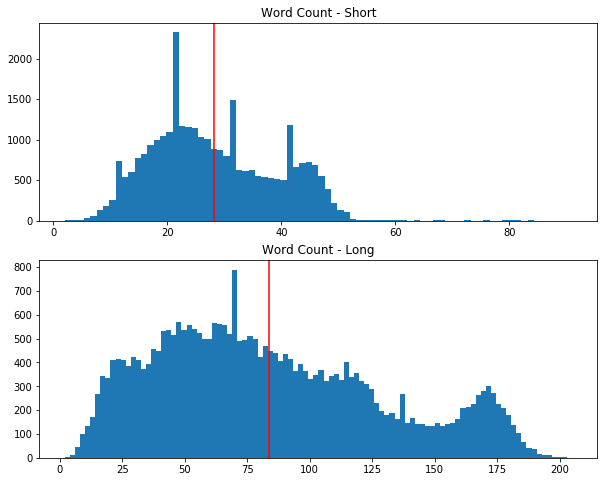

28.213446496921286
83.7624563155267


In [268]:
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.title('Word Count - Short')
plt.hist(cleaner_df['word_count_short'], bins=80)
plt.axvline(cleaner_df['word_count_short'].mean(), c='red', label='Mean')

plt.subplot(212)
plt.title('Word Count - Long')
plt.hist(cleaner_df['word_count_long'], bins=100)
plt.axvline(cleaner_df['word_count_long'].mean(), c='red', label='Mean')
plt.show()

print(cleaner_df['word_count_short'].mean())
print(cleaner_df['word_count_long'].mean())

In [269]:
cleaner_df['word_count_long'].sum()

2516643

In [270]:
cleaner_df[ cleaner_df['word_count_long'] < cleaner_df['word_count_short'] ]

,tconst,title,release_year,release_date,runtime,plot_short,plot_long,imdb_rating,num_imdb_votes,num_user_reviews,num_critic_reviews,action,adult,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film-noir,game-show,history,horror,music,musical,mystery,news,romance,sci-fi,sport,thriller,war,western,word_count_short,word_count_long
31,tt0013075,Dr. Jack,1922,26 November 1922,60,"Country Doctor, Jack Jackson is called in to t...","Country Doctor, Jack Jackson is called in to t...",7.1,1159,18.0,7.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,39
91,tt0016690,Brown of Harvard,1926,2 May 1926,85,"Tom Brown shows up at Harvard, confident and a...","Tom Brown shows up at Harvard, confident and a...",6.2,1387,11.0,3.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,47,36
96,tt0018455,Sunrise: A Song of Two Humans,1927,4 November 1927,94,An allegorical tale about a man fighting the g...,"In this fable-morality subtitled ""A Song of Tw...",8.1,44852,241.0,181.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,32,31
341,tt0024252,Liebelei,1933,27 February 1936,88,Vienna in the beginning of the twentieth centu...,Vienna in the beginning of the twentieth centu...,7.5,1242,11.0,15.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,43,42
486,tt0027407,Bullets or Ballots,1936,6 June 1936,82,After Police Captain Dan McLaren becomes polic...,After Police Captain Dan McLaren becomes polic...,7.1,2455,32.0,15.0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,43,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29372,tt5696326,Running for Grace,2018,7 September 2018,110,A timeless tale that takes place against the b...,A timeless tale that takes place against the b...,6.1,1120,45.0,5.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,45,39
29418,tt7534314,Niet Schieten,2018,10 October 2018,139,"In one fell swoop, nine-year old David Van de ...","In one fell swoop, nine-year old David Van de ...",7.7,1038,6.0,5.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,45
29760,tt7493370,Adults in the Room,2019,3 October 2019,124,Greece in 2015: the economy is in tatters and ...,Provides an extraordinary account of low cunni...,5.8,3642,41.0,22.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,37
29980,tt9352780,Cold Case Hammarskjöld,2019,7 February 2019,128,Danish director Mads Brügger and Swedish priva...,Danish director Mads Brügger and Swedish priva...,7.6,1421,17.0,64.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,40,39


In [271]:
cleaner_df = cleaner_df.drop(['title','plot_short', 'word_count_short'], axis=1)
#cleaner_df = cleaner_df.drop(['word_count_short'], axis=1)

In [272]:
for i in cleaner_df.index:
    if 'jan' in cleaner_df.loc[i,'release_date'].lower():
        cleaner_df.loc[i,'release_month'] = 1
    elif 'feb' in cleaner_df.loc[i,'release_date'].lower():
        cleaner_df.loc[i,'release_month'] = 2
    elif 'mar' in cleaner_df.loc[i,'release_date'].lower():
        cleaner_df.loc[i,'release_month'] = 3
    elif 'apr' in cleaner_df.loc[i,'release_date'].lower():
        cleaner_df.loc[i,'release_month'] = 4
    elif 'may' in cleaner_df.loc[i,'release_date'].lower():
        cleaner_df.loc[i,'release_month'] = 5
    elif 'jun' in cleaner_df.loc[i,'release_date'].lower():
        cleaner_df.loc[i,'release_month'] = 6
    elif 'jul' in cleaner_df.loc[i,'release_date'].lower():
        cleaner_df.loc[i,'release_month'] = 7
    elif 'aug' in cleaner_df.loc[i,'release_date'].lower():
        cleaner_df.loc[i,'release_month'] = 8
    elif 'sep' in cleaner_df.loc[i,'release_date'].lower():
        cleaner_df.loc[i,'release_month'] = 9
    elif 'oct' in cleaner_df.loc[i,'release_date'].lower():
        cleaner_df.loc[i,'release_month'] = 10
    elif 'nov' in cleaner_df.loc[i,'release_date'].lower():
        cleaner_df.loc[i,'release_month'] = 11
    elif 'dec' in cleaner_df.loc[i,'release_date'].lower():
        cleaner_df.loc[i,'release_month'] = 12
    else:
        cleaner_df.loc[i,'release_month'] = 0
    print(i,end='\r')
cleaner_df = cleaner_df.astype({'release_month': 'int64'})

In [273]:
cols = list(cleaner_df.columns.values)

In [274]:
cols

['tconst',
 'release_year',
 'release_date',
 'runtime',
 'plot_long',
 'imdb_rating',
 'num_imdb_votes',
 'num_user_reviews',
 'num_critic_reviews',
 'action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'romance',
 'sci-fi',
 'sport',
 'thriller',
 'war',
 'western',
 'word_count_long',
 'release_month']

In [275]:
new_cols = [
 'tconst',
 'release_year',
 'release_month',
 'release_date',
 'runtime',
 'word_count_long',
 'imdb_rating',
 'num_imdb_votes',
 'num_user_reviews',
 'num_critic_reviews',
 'action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'romance',
 'sci-fi',
 'sport',
 'thriller',
 'war',
 'western',
 'plot_long'
 ]

In [281]:
clean_df = cleaner_df[new_cols].copy()
clean_df = clean_df.drop(['tconst','release_date'], axis=1)
clean_df = clean_df.reset_index(drop=True)
clean_df.head(1)

,release_year,release_month,runtime,word_count_long,imdb_rating,num_imdb_votes,num_user_reviews,num_critic_reviews,action,adult,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film-noir,game-show,history,horror,music,musical,mystery,news,romance,sci-fi,sport,thriller,war,western,plot_long
0,1920,2,67,170,8.1,52815,222.0,156.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,"Francis, a young man, recalls in his memory th..."


In [288]:
clean_df[ clean_df['game-show'] == 1 ]

,release_year,release_month,runtime,word_count_long,imdb_rating,num_imdb_votes,num_user_reviews,num_critic_reviews,action,adult,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film-noir,game-show,history,horror,music,musical,mystery,news,romance,sci-fi,sport,thriller,war,western,plot_long
27667,2017,9,104,22,5.6,3675,34.0,31.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,An unsettling look at reality T.V. where a dis...


In [290]:
clean = clean_df.copy()
clean = clean[ clean['adult'] == 0 ]
clean = clean[ clean['game-show'] == 0 ]
clean = clean.drop(['adult','news','game-show'],axis=1)
clean.head(2)

,release_year,release_month,runtime,word_count_long,imdb_rating,num_imdb_votes,num_user_reviews,num_critic_reviews,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film-noir,history,horror,music,musical,mystery,romance,sci-fi,sport,thriller,war,western,plot_long
0,1920,2,67,170,8.1,52815,222.0,156.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,"Francis, a young man, recalls in his memory th..."
1,1920,6,91,33,7.2,6136,49.0,45.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,"In 16th-century Prague, a rabbi creates the Go..."


In [291]:
import csv
clean.to_csv('clean_df.tsv', sep='\t', quoting=csv.QUOTE_ALL)